In [190]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB


from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

# 1. Import dataset

In [191]:
df = pd.read_csv("./data/earthquake_1995-2023.csv")

In [192]:
# view summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   title      1000 non-null   object 
 1   magnitude  1000 non-null   float64
 2   date_time  1000 non-null   object 
 3   cdi        1000 non-null   int64  
 4   mmi        1000 non-null   int64  
 5   alert      449 non-null    object 
 6   tsunami    1000 non-null   int64  
 7   sig        1000 non-null   int64  
 8   net        1000 non-null   object 
 9   nst        1000 non-null   int64  
 10  dmin       1000 non-null   float64
 11  gap        1000 non-null   float64
 12  magType    1000 non-null   object 
 13  depth      1000 non-null   float64
 14  latitude   1000 non-null   float64
 15  longitude  1000 non-null   float64
 16  location   994 non-null    object 
 17  continent  284 non-null    object 
 18  country    651 non-null    object 
dtypes: float64(6), int64(5), object(8)
memory usage: 

# 2. Clean

In [193]:
df.head()

,title,magnitude,date_time,cdi,mmi,alert,tsunami,sig,net,nst,dmin,gap,magType,depth,latitude,longitude,location,continent,country
0,"M 6.5 - 42 km W of Sola, Vanuatu",6.5,16-08-2023 12:47,7,4,green,0,657,us,114,7.177000,25.0,mww,192.955,-13.8814,167.1580,"Sola, Vanuatu",NaN,Vanuatu
1,"M 6.5 - 43 km S of Intipucá, El Salvador",6.5,19-07-2023 00:22,8,6,yellow,0,775,us,92,0.679000,40.0,mww,69.727,12.8140,-88.1265,"Intipucá, El Salvador",NaN,NaN
2,"M 6.6 - 25 km ESE of Loncopué, Argentina",6.6,17-07-2023 03:05,7,5,green,0,899,us,70,1.634000,28.0,mww,171.371,-38.1911,-70.3731,"Loncopué, Argentina",South America,Argentina
3,"M 7.2 - 98 km S of Sand Point, Alaska",7.2,16-07-2023 06:48,6,6,green,1,860,us,173,0.907000,36.0,mww,32.571,54.3844,-160.6990,"Sand Point, Alaska",NaN,NaN
4,M 7.3 - Alaska Peninsula,7.3,16-07-2023 06:48,0,5,NaN,1,820,at,79,0.879451,172.8,Mi,21.000,54.4900,-160.7960,Alaska Peninsula,NaN,NaN


In [194]:
# check null values
df.isnull().sum()

title          0
magnitude      0
date_time      0
cdi            0
mmi            0
alert        551
tsunami        0
sig            0
net            0
nst            0
dmin           0
gap            0
magType        0
depth          0
latitude       0
longitude      0
location       6
continent    716
country      349
dtype: int64

In [195]:
df[df['location'].isna()]

,title,magnitude,date_time,cdi,mmi,alert,tsunami,sig,net,nst,dmin,gap,magType,depth,latitude,longitude,location,continent,country
30,M 6.8 -,6.8,20-01-2023 22:09,4,3,green,0,718,us,60,5.129,61.0,mww,610.671,-26.7209,-63.0394,NaN,South America,Argentina
37,M 7.0 -,7.0,12-11-2022 07:09,3,3,green,1,755,us,147,3.125,18.0,mww,579.000,-20.0508,-178.3460,NaN,Oceania,Fiji
39,M 6.6 -,6.6,09-11-2022 10:14,0,2,green,1,670,us,131,4.998,27.0,mww,624.464,-25.5948,178.2780,NaN,NaN,NaN
54,M 6.9 -,6.9,19-05-2022 10:13,2,5,green,1,733,us,127,0.371,45.0,mww,10.000,-54.1325,159.0270,NaN,NaN,NaN
103,M 6.9 -,6.9,01-05-2021 01:27,7,6,green,1,919,us,0,2.619,35.0,mww,43.000,38.2296,141.6650,NaN,Asia,Japan
281,M 6.9 -,6.9,28-05-2016 05:38,3,3,green,1,733,us,0,5.485,19.0,mww,405.690,-21.9724,-178.2040,NaN,NaN,NaN


I think the alert may not be important since we already has magnitude data \
This also apply to title \
Also the location, continent and country also applies since we have latitude and longitude \
Drop time also

In [196]:
df.drop('title',axis=1, inplace=True)
df.drop('alert',axis=1, inplace=True)
df.drop('location',axis=1, inplace=True)
df.drop('continent',axis=1, inplace=True)
df.drop('country',axis=1, inplace=True)
df.drop('date_time',axis=1,inplace=True)
df = df.dropna()

In [197]:
df.isnull().sum()

magnitude    0
cdi          0
mmi          0
tsunami      0
sig          0
net          0
nst          0
dmin         0
gap          0
magType      0
depth        0
latitude     0
longitude    0
dtype: int64

In [198]:
df['net'].value_counts()
# most data are by us, so drop net

net
us          960
ak           13
official      9
at            3
ci            3
nc            3
duputel       3
pt            2
hv            2
nn            1
uw            1
Name: count, dtype: int64

In [199]:
df.drop('net',axis=1,inplace=True)

In [200]:
df.head()

,magnitude,cdi,mmi,tsunami,sig,nst,dmin,gap,magType,depth,latitude,longitude
0,6.5,7,4,0,657,114,7.177000,25.0,mww,192.955,-13.8814,167.1580
1,6.5,8,6,0,775,92,0.679000,40.0,mww,69.727,12.8140,-88.1265
2,6.6,7,5,0,899,70,1.634000,28.0,mww,171.371,-38.1911,-70.3731
3,7.2,6,6,1,860,173,0.907000,36.0,mww,32.571,54.3844,-160.6990
4,7.3,0,5,1,820,79,0.879451,172.8,Mi,21.000,54.4900,-160.7960


# 3. EDA

tsunami
0    134
1     66
Name: count, dtype: int64


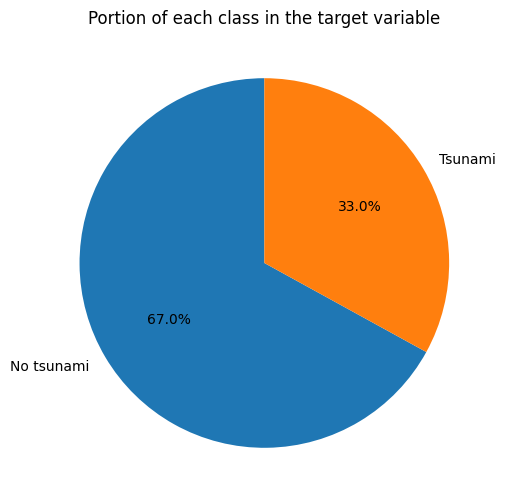

In [213]:
print(y_test.value_counts())
# plot the portion of each class in the target variable as pie chart
plt.figure(figsize=(6, 6))
plt.pie(y_test.value_counts(), labels=['No tsunami', 'Tsunami'], autopct='%1.1f%%', startangle=90)
plt.title('Portion of each class in the target variable')
plt.show()

In [201]:
# encode 
# magType is not an float or integer
# magType: The method or algorithm used to calculate the preferred magnitude for the event

In [202]:
obj_params = []
for col in df.columns:
    if df[col].dtype == 'object':
        obj_params.append(col)


In [203]:
# Label Encoding
encoder = LabelEncoder()

for col in obj_params:
    df[col] = encoder.fit_transform(df[col])
df.head(5)

,magnitude,cdi,mmi,tsunami,sig,nst,dmin,gap,magType,depth,latitude,longitude
0,6.5,7,4,0,657,114,7.177000,25.0,8,192.955,-13.8814,167.1580
1,6.5,8,6,0,775,92,0.679000,40.0,8,69.727,12.8140,-88.1265
2,6.6,7,5,0,899,70,1.634000,28.0,8,171.371,-38.1911,-70.3731
3,7.2,6,6,1,860,173,0.907000,36.0,8,32.571,54.3844,-160.6990
4,7.3,0,5,1,820,79,0.879451,172.8,0,21.000,54.4900,-160.7960


In [204]:
# Scaling
scale = MinMaxScaler()

for col in obj_params:
    df[[col]] = scale.fit_transform(df[[col]])
df.head()

,magnitude,cdi,mmi,tsunami,sig,nst,dmin,gap,magType,depth,latitude,longitude
0,6.5,7,4,0,657,114,7.177000,25.0,1.0,192.955,-13.8814,167.1580
1,6.5,8,6,0,775,92,0.679000,40.0,1.0,69.727,12.8140,-88.1265
2,6.6,7,5,0,899,70,1.634000,28.0,1.0,171.371,-38.1911,-70.3731
3,7.2,6,6,1,860,173,0.907000,36.0,1.0,32.571,54.3844,-160.6990
4,7.3,0,5,1,820,79,0.879451,172.8,0.0,21.000,54.4900,-160.7960


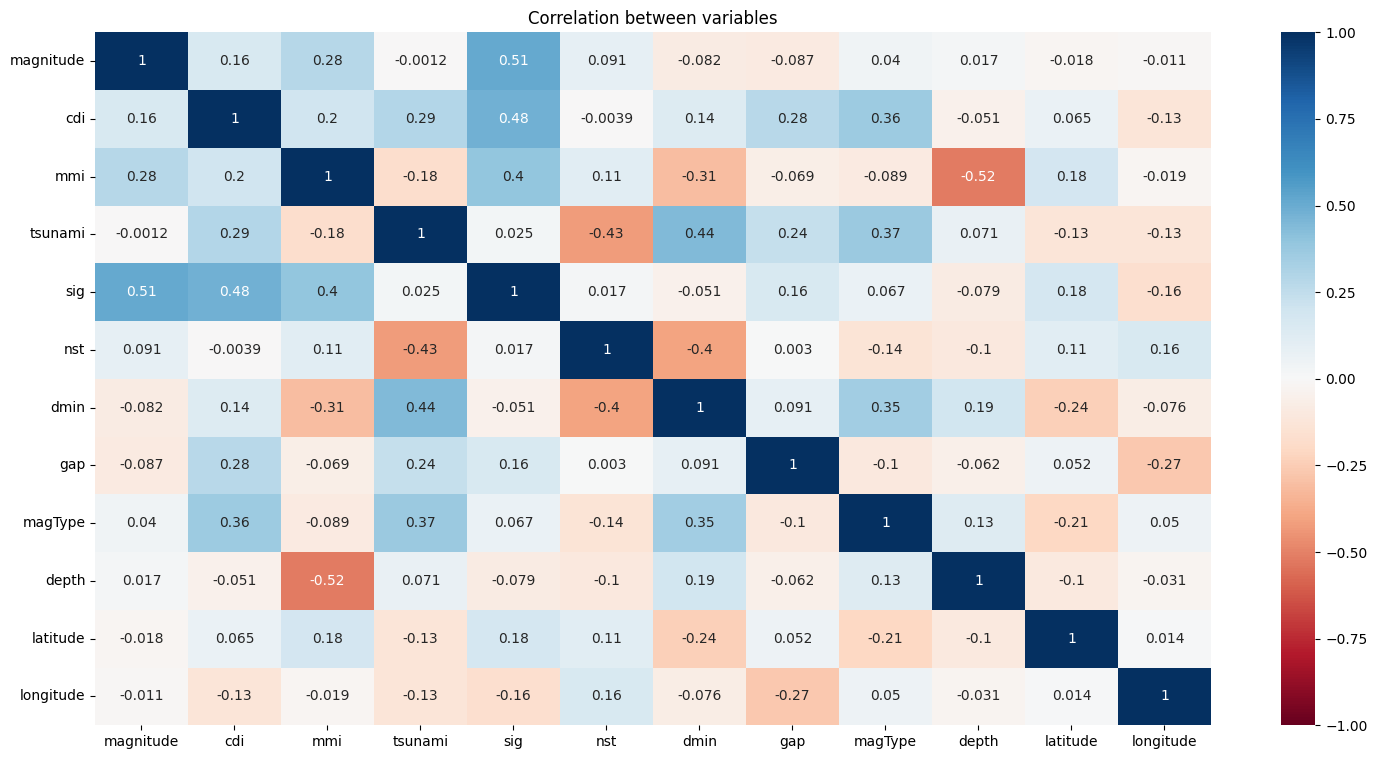

In [205]:
params = []
for col in df.columns:
    if df[col].dtype != 'object':
        params.append(col)
# plot a heatmap to check the correlation between the all attribute now are converted to floats
# for better grouping and interpretation,sort columns by the list of columns created above

plt.figure(figsize=(18, 9))
# nomralize the color scale
sns.heatmap(df[params].corr(), annot=True, cmap='RdBu', vmin=-1, vmax=1)
plt.title('Correlation between variables')
plt.show()

# 4. Model

In [206]:
# split the data into X and y
X = df.drop('tsunami', axis=1)
y = df['tsunami']

# split the data into train and validation set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [207]:
# build a dictionary of models
models = {
    # 'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'KNN': KNeighborsClassifier(),
    'SVM': SVC(),
    'Naive Bayes': GaussianNB(),
    'Gradient Boosting': GradientBoostingClassifier()
}

In [208]:
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_val_pred = model.predict(X_test)
    df = pd.DataFrame({'train_accuracy': [accuracy_score(y_train, y_train_pred)],
                        'train_precision': [precision_score(y_train, y_train_pred)],
                        'train_recall': [recall_score(y_train, y_train_pred)],
                        'train_f1': [f1_score(y_train, y_train_pred)],
                        'train_roc_auc': [roc_auc_score(y_train, y_train_pred)],
                        
                        'val_accuracy': [accuracy_score(y_test, y_val_pred)],
                        'val_precision': [precision_score(y_test, y_val_pred)],
                        'val_recall': [recall_score(y_test, y_val_pred)],
                        'val_f1': [f1_score(y_test, y_val_pred)],
                        'val_roc_auc': [roc_auc_score(y_test, y_val_pred)]})
    return df

In [209]:
# iterate through the dictionary and evaluate each model
results_l = []
for name, model in models.items():
    model_results = evaluate_model(model, X_train, y_train, X_test, y_test)
    model_results['model'] = name
    results_l.append(model_results)

# concatenate the results
results = pd.concat(results_l, axis=0).reset_index(drop=True)

In [210]:
results.sort_values(by='val_accuracy', ascending=False)

,train_accuracy,train_precision,train_recall,train_f1,train_roc_auc,val_accuracy,val_precision,val_recall,val_f1,val_roc_auc,model
1,1.00000,1.000000,1.000000,1.000000,1.000000,0.905,0.850746,0.863636,0.857143,0.894505,Random Forest
0,1.00000,1.000000,1.000000,1.000000,1.000000,0.890,0.854839,0.803030,0.828125,0.867933,Decision Tree
5,0.97875,0.951493,0.984556,0.967742,0.980263,0.890,0.854839,0.803030,0.828125,0.867933,Gradient Boosting
4,0.83250,0.698413,0.849421,0.766551,0.836910,0.855,0.753425,0.833333,0.791367,0.849502,Naive Bayes
2,0.86250,0.811715,0.749035,0.779116,0.832928,0.800,0.740741,0.606061,0.666667,0.750791,KNN
3,0.71375,0.692308,0.208494,0.320475,0.582066,0.685,0.600000,0.136364,0.222222,0.545794,SVM


# 6. Test

In [214]:
# test using naive bayes here
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

              precision    recall  f1-score   support

           0       0.91      0.87      0.89       134
           1       0.75      0.83      0.79        66

    accuracy                           0.85       200
   macro avg       0.83      0.85      0.84       200
weighted avg       0.86      0.85      0.86       200

ROC AUC score: 0.8495024875621892


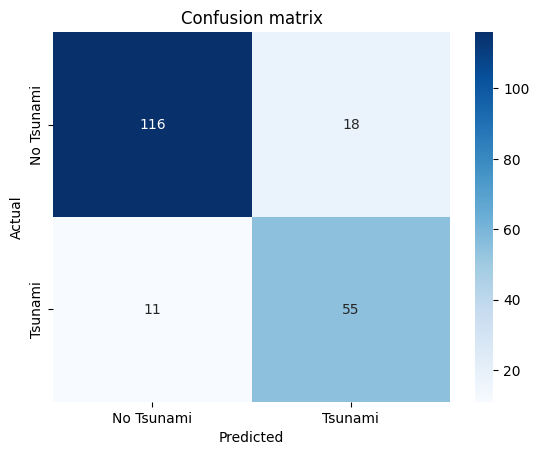

In [216]:
# predict the test set
y_test_pred = model.predict(X_test)

# print the classification report
print(classification_report(y_test, y_test_pred))
print(f'ROC AUC score: {roc_auc_score(y_test, y_test_pred)}')

# plot the confusion matrix
cm = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks([0.5, 1.5], ['No Tsunami', 'Tsunami'])
plt.yticks([0.5, 1.5], ['No Tsunami', 'Tsunami'])
plt.title('Confusion matrix')
plt.show()

In [217]:
# test using decision tree here
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

              precision    recall  f1-score   support

           0       0.91      0.93      0.92       134
           1       0.86      0.82      0.84        66

    accuracy                           0.90       200
   macro avg       0.88      0.88      0.88       200
weighted avg       0.89      0.90      0.89       200

ROC AUC score: 0.8755088195386704


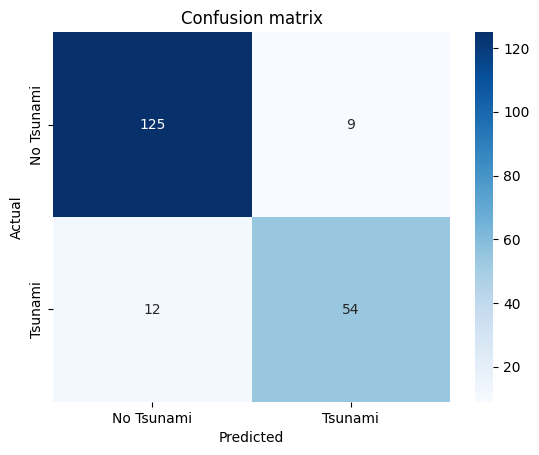

In [218]:
# predict the test set
y_test_pred = model.predict(X_test)

# print the classification report
print(classification_report(y_test, y_test_pred))
print(f'ROC AUC score: {roc_auc_score(y_test, y_test_pred)}')

# plot the confusion matrix
cm = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks([0.5, 1.5], ['No Tsunami', 'Tsunami'])
plt.yticks([0.5, 1.5], ['No Tsunami', 'Tsunami'])
plt.title('Confusion matrix')
plt.show()

In [219]:
# random forest
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

              precision    recall  f1-score   support

           0       0.93      0.93      0.93       134
           1       0.86      0.86      0.86        66

    accuracy                           0.91       200
   macro avg       0.90      0.90      0.90       200
weighted avg       0.91      0.91      0.91       200

ROC AUC score: 0.8982360922659431


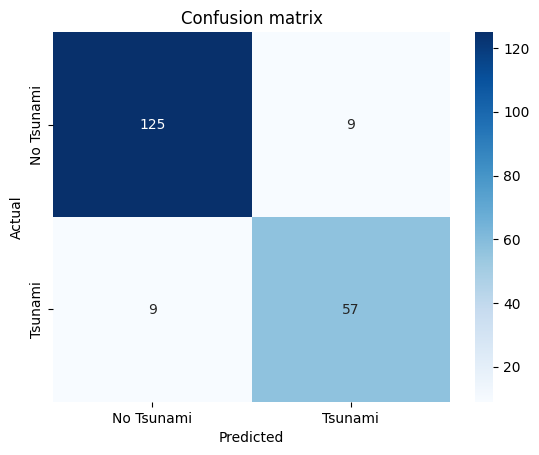

In [220]:
# predict the test set
y_test_pred = model.predict(X_test)

# print the classification report
print(classification_report(y_test, y_test_pred))
print(f'ROC AUC score: {roc_auc_score(y_test, y_test_pred)}')

# plot the confusion matrix
cm = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks([0.5, 1.5], ['No Tsunami', 'Tsunami'])
plt.yticks([0.5, 1.5], ['No Tsunami', 'Tsunami'])
plt.title('Confusion matrix')
plt.show()